In [34]:
import random

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Option Valuation Methods - Homework 2
### Andrei Stefan


In [35]:
# seed for reproducibility
np.random.seed(42)

## Exercise 1: Implied volatility

#### 1a)

In [36]:
#Import the data from Chapter 14 of the book
data = pd.DataFrame({'Exercise Price': [5125,5225,5325,5425,5525, 5625,5725, 5825],'Option Price': [485,415,350,290.5,236,189.5,149,115],})
T = 4/12
r=0.05
t=0
S = 5420.3
data

,Exercise Price,Option Price
0,5125,485.0
1,5225,415.0
2,5325,350.0
3,5425,290.5
4,5525,236.0
5,5625,189.5
6,5725,149.0
7,5825,115.0


In [37]:
def call_value(S, E, r, tau, sigma):
    """
    Calculate the value of a call option using the Black-Scholes formula.
    :param S: Asset price at time t
    :param E: Exercise price
    :param r: interest rate
    :param tau: time to expiry (T-t)
    :param sigma: volatility
    :return: option value, delta, and vega
    """
    if tau > 0: # if the option has not expired/ is not at time T
        d1 = (np.log(S / E) + (r +0.5* sigma ** 2) * tau) / (sigma * np.sqrt(tau))
        d2 = d1 - sigma * np.sqrt(tau)
        # if option_type == 'call':
        value = S * stats.norm.cdf(d1) - E * np.exp(-r * tau) * stats.norm.cdf(d2)
        delta= stats.norm.cdf(d1)
        vega = S * np.sqrt(tau) * stats.norm.pdf(d1)
        return value, delta, vega
    else: # if the option is at time T
        return max(S - E, 0), 1 if S > E else 0,0


In [38]:
def newtons_method_volatility(S, E, r, tau, C_true, tol=1e-6, max_iter=100):
    """
    Calculate the implied volatility of an option using Newton's method.
    :param S: Asset price at time t
    :param E:  Exercise price
    :param r: interest rate
    :param tau: time to expiry (T-t)
    :param C_true: true option price
    :param tol: tolerance
    :param max_iter: maximum number of iterations
    :return: implied volatility
    """
    # initial guess for volatility
    sigmahat = np.sqrt(2*abs((np.log(S/E) + r*tau)/tau))

    sigma = sigmahat
    sigmadiff = 1
    k=1
    # while the difference between the estimated and true option price is greater than the tolerance
    # or the maximum number of iterations has not been reached
    while sigmadiff >= tol and k < max_iter:
        C, delta, vega = call_value(S, E, r, tau, sigma)
        vega = max(vega, 1e-6)
        increment = (C-C_true)/vega

        # cap the increment to prevent large changes in sigma
        sigma = sigma - np.clip(increment,-0.5,0.5)

        sigmadiff = abs(np.clip(increment,-0.5,0.5))
        k += 1
    return sigma

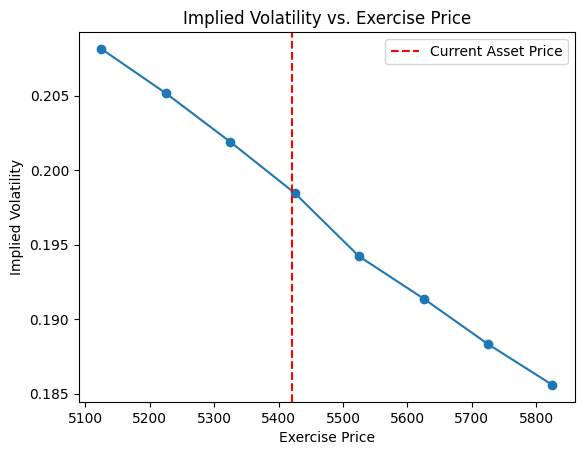

In [39]:
imp_volatilities = []
for i in range(len(data)):
    E = data['Exercise Price'][i]
    C_true = data['Option Price'][i]
    implied_volatility = newtons_method_volatility(S, E, r, T, C_true)
    imp_volatilities.append(implied_volatility)


plt.plot(data['Exercise Price'], imp_volatilities, 'o-')
plt.axvline(x=S, color='r', linestyle='--', label='Current Asset Price')

plt.xlabel('Exercise Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility vs. Exercise Price')
plt.legend()
plt.show()

#### 1b)

A for `$AAPL`

##### 1. fetching data (via barchart.com)

In [40]:
# Import option data for AAPL with various expiration times (imported at 2025-01-10)
AAPL_17_01 = pd.read_csv('data/aapl-options-exp-2025-01-17.csv')
AAPL_24_01 = pd.read_csv('data/aapl-options-exp-2025-01-24.csv')
AAPL_17_10 = pd.read_csv('data/aapl-options-exp-2025-10-17.csv')
AAPL_18_06_26 = pd.read_csv('data/aapl-options-exp-2026-06-18.csv')
print(AAPL_17_01.head())

   Strike Moneyness    Bid    Mid    Ask   Last Change     %Chg Volume  \
0  212.50   +10.28%  24.25  24.93  25.60  24.95  -5.18  -17.19%     41   
1  215.00    +9.23%  21.90  22.23  22.55  21.35  -6.30  -22.78%    220   
2  217.50    +8.17%  18.75  19.75  20.75  25.34   unch     unch      0   
3  220.00    +7.11%  17.00  17.30  17.60  17.30  -5.85  -25.27%  1,667   
4  222.50    +6.06%  14.35  15.05  15.75  14.30  -6.55  -31.41%     48   

  Open Int OI Chg    Delta      IV  Type Last Trade  
0        1     +1  0.93882  56.39%  Call   01/10/25  
1   23,386    -45  0.95776  44.77%  Call   01/10/25  
2        4     +4  0.95075  41.18%  Call   01/08/25  
3   36,713    -48  0.93910  38.12%  Call   01/10/25  
4       40    +15  0.90178  38.87%  Call   01/10/25  


In [41]:
# Filter out the call options
AAPL_calls_17_01 = AAPL_17_01.loc[AAPL_17_01['Type'] == 'Call'].copy()
AAPL_calls_24_01 = AAPL_24_01.loc[AAPL_24_01['Type'] == 'Call'].copy()
AAPL_calls_17_10 = AAPL_17_10.loc[AAPL_17_10['Type'] == 'Call'].copy()
AAPL_calls_18_06_26 = AAPL_18_06_26.loc[AAPL_18_06_26['Type'] == 'Call'].copy()

# Convert the data types from the csv file to numerical/percentage values
AAPL_calls_17_01.loc[:, 'Strike'] = pd.to_numeric(AAPL_calls_17_01['Strike'])
AAPL_calls_24_01.loc[:, 'Strike'] = pd.to_numeric(AAPL_calls_24_01['Strike'])
AAPL_calls_17_10.loc[:, 'Strike'] = pd.to_numeric(AAPL_calls_17_10['Strike'])
AAPL_calls_18_06_26.loc[:, 'Strike'] = pd.to_numeric(AAPL_calls_18_06_26['Strike'])

AAPL_calls_17_01.loc[:, 'Last'] = pd.to_numeric(AAPL_calls_17_01['Last'])
AAPL_calls_24_01.loc[:, 'Last'] = pd.to_numeric(AAPL_calls_24_01['Last'])
AAPL_calls_17_10.loc[:, 'Last'] = pd.to_numeric(AAPL_calls_17_10['Last'])
AAPL_calls_18_06_26.loc[:, 'Last'] = pd.to_numeric(AAPL_calls_18_06_26['Last'])

AAPL_calls_17_01.loc[:, 'IV'] = AAPL_calls_17_01['IV'].str.rstrip('%').astype('float') / 100.0
AAPL_calls_24_01.loc[:, 'IV'] = AAPL_calls_24_01['IV'].str.rstrip('%').astype('float') / 100.0
AAPL_calls_17_10.loc[:, 'IV'] = AAPL_calls_17_10['IV'].str.rstrip('%').astype('float') / 100.0
AAPL_calls_18_06_26.loc[:, 'IV'] = AAPL_calls_18_06_26['IV'].str.rstrip('%').astype('float') / 100.0

##### 2. predefine useful functions

In [42]:
from scipy.interpolate import CubicSpline

def rfrate(T_option):
    """
    Calculate the risk-free rate for a given option maturity using a cubic spline interpolation.
    :param T_option: option time to maturity (w.r.t. 10th January 2025) (in years)
    :return: risk-free rate
    """
    maturities = np.array([1/12,1/6,1/4,1/3,1/2,1,2,3,5,7,10,20,30])  # years
    yields = np.array([4.42,4.35,4.36,4.33,4.27,4.25,4.40,4.46,4.59,4.70,4.77,5.04,4.96 ])
    # sourced from treasury.gov @ 2025-01-10
    spline = CubicSpline(maturities, yields)
    risk_free_rate = spline(T_option)
    return risk_free_rate

0.04644120410971972


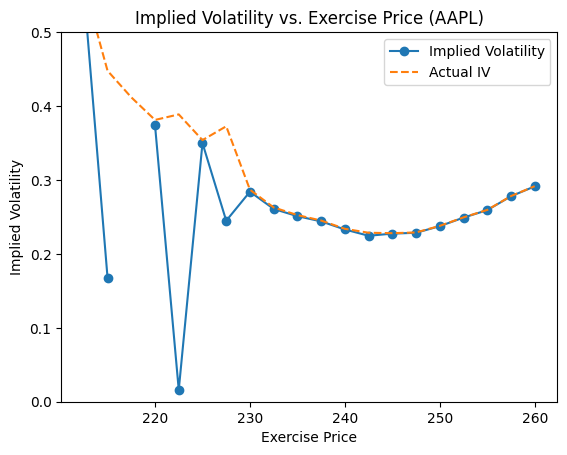

In [43]:
impl_vol_AAPL_wk = []
T_option = 6/365
r = rfrate(T_option)/100
S0 = 236.85
print(r)
for i in range(0, len(AAPL_calls_17_01)):
    E = AAPL_calls_17_01['Strike'][i]
    C_true = AAPL_calls_17_01['Last'][i]

    implied_volatility = newtons_method_volatility(S0, E, r, T_option, C_true)
    impl_vol_AAPL_wk.append(implied_volatility)
strike = np.array(AAPL_calls_17_01['Strike'])
impl_vol_AAPL_wk = np.array(impl_vol_AAPL_wk)
#replace large values with nan - this is due to the newtons method not converging
# for some options

impl_vol_AAPL_wk[impl_vol_AAPL_wk > 1] = np.nan
impl_vol_AAPL_wk[impl_vol_AAPL_wk < 0] = np.nan

plt.plot(strike, impl_vol_AAPL_wk, 'o-', label='Implied Volatility')
plt.plot(strike,AAPL_calls_17_01["IV"], '--', label='Actual IV')

plt.ylim(0, 0.5)
plt.xlabel('Exercise Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility vs. Exercise Price (AAPL)')
plt.legend()
plt.show()


0.04558953187113571


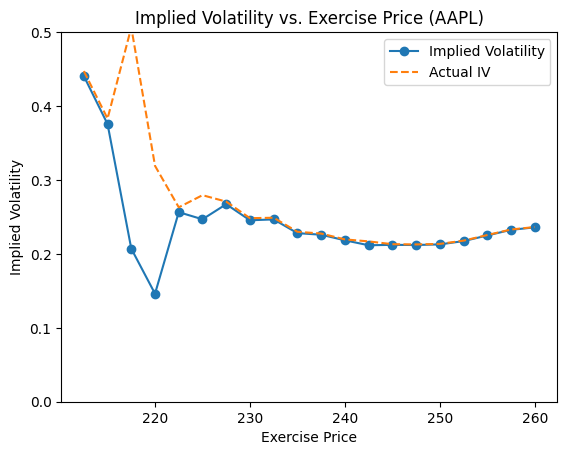

In [44]:
impl_vol_AAPL_2wk = []
T_option = 13/365
r = rfrate(T_option)/100
S0 = 236.85
print(r)
for i in range(0, len(AAPL_calls_24_01)):
    E = AAPL_calls_24_01['Strike'][i]
    C_true = AAPL_calls_24_01['Last'][i]

    implied_volatility = newtons_method_volatility(S0, E, r, T_option, C_true)
    impl_vol_AAPL_2wk.append(implied_volatility)
strike = np.array(AAPL_calls_24_01['Strike'])
impl_vol_AAPL_2wk = np.array(impl_vol_AAPL_2wk)
#replace large values with nan
impl_vol_AAPL_2wk[impl_vol_AAPL_2wk > 1] = np.nan
impl_vol_AAPL_2wk[impl_vol_AAPL_2wk < 0] = np.nan
#print(strike)
#print(impl_vol_AAPL)
plt.plot(strike, impl_vol_AAPL_2wk, 'o-', label='Implied Volatility')
plt.plot(strike,AAPL_calls_24_01["IV"], '--', label='Actual IV')
#plt.axvline(x=S0, color='r', linestyle='--', label='Current Asset Price')
plt.ylim(0, 0.5)
plt.xlabel('Exercise Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility vs. Exercise Price (AAPL)')
plt.legend()
plt.show()

0.04237891996251694


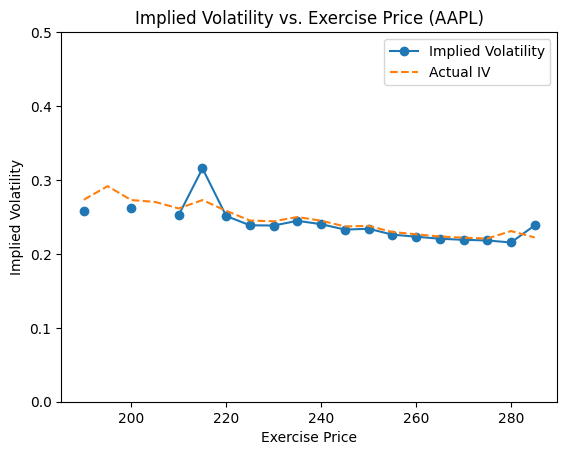

In [45]:
impl_vol_AAPL_3 = []
T_option = 278 / 365
r = rfrate(T_option) / 100
S0 = 236.85
print(r)
for i in range(0, len(AAPL_calls_17_10)):
    E = AAPL_calls_17_10['Strike'][i]
    C_true = AAPL_calls_17_10['Last'][i]

    implied_volatility = newtons_method_volatility(S0, E, r, T_option, C_true)
    impl_vol_AAPL_3.append(implied_volatility)
strike = np.array(AAPL_calls_17_10['Strike'])
impl_vol_AAPL_3 = np.array(impl_vol_AAPL_3)
#replace large values with nan
impl_vol_AAPL_3[impl_vol_AAPL_3 > 1] = np.nan
impl_vol_AAPL_3[impl_vol_AAPL_3 < 0] = np.nan
#print(strike)
#print(impl_vol_AAPL_3)
plt.plot(strike, impl_vol_AAPL_3, 'o-', label='Implied Volatility')
plt.plot(strike, AAPL_calls_17_10["IV"], '--', label='Actual IV')
#plt.axvline(x=S0, color='r', linestyle='--', label='Current Asset Price')
plt.ylim(0, 0.5)
plt.xlabel('Exercise Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility vs. Exercise Price (AAPL)')
plt.legend()
plt.show()

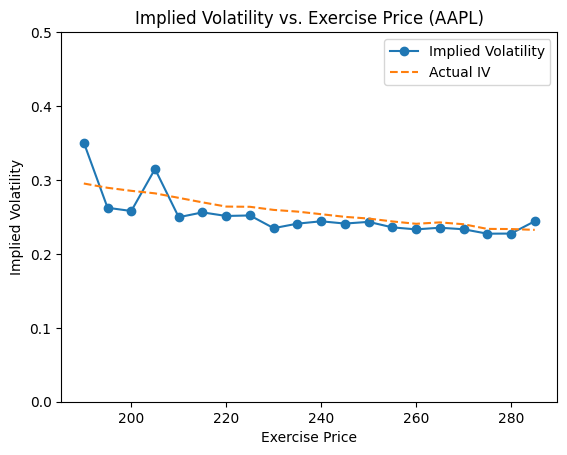

In [46]:
impl_vol_AAPL_4 = []
T_option = 522 / 365
r = rfrate(T_option) / 100
S0 = 236.85
#print(r)
for i in range(0, len(AAPL_calls_18_06_26)):
    E = AAPL_calls_18_06_26['Strike'][i]
    C_true = AAPL_calls_18_06_26['Last'][i]

    implied_volatility = newtons_method_volatility(S0, E, r, T_option, C_true)
    impl_vol_AAPL_4.append(implied_volatility)

strike = np.array(AAPL_calls_18_06_26['Strike'])
impl_vol_AAPL_4 = np.array(impl_vol_AAPL_4)
#replace large values with nan
impl_vol_AAPL_4[impl_vol_AAPL_4 > 1] = np.nan
impl_vol_AAPL_4[impl_vol_AAPL_4 < 0] = np.nan
#print(strike)
#print(impl_vol_AAPL_4)
plt.plot(strike, impl_vol_AAPL_4, 'o-', label='Implied Volatility')
plt.plot(strike, AAPL_calls_18_06_26["IV"], '--', label='Actual IV')
#plt.axvline(x=S0, color='r', linestyle='--', label='Current Asset Price')
plt.ylim(0, 0.5)
plt.xlabel('Exercise Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility vs. Exercise Price (AAPL)')
plt.legend()
plt.show()

There seems to be some issues with approximating the IV with newton's method, which could be stemming from either the fact that the option is an American Call or that the method is not converging. This is evident from the fact that the IV is not converging to the actual IV, as seen in the plots above.

#### 1c)

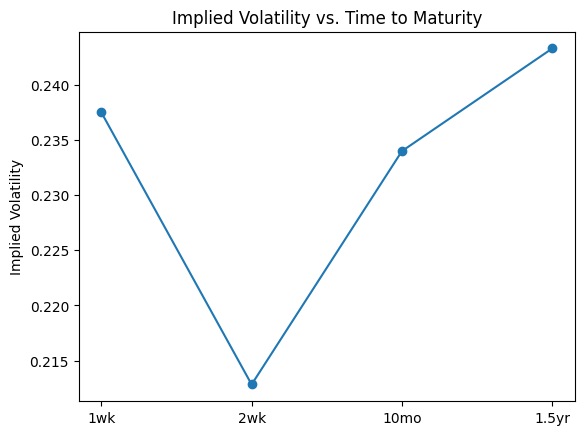

In [47]:
vol_4 = impl_vol_AAPL_4[AAPL_calls_18_06_26[AAPL_calls_18_06_26['Strike'] == 250].index]
vol_3 = impl_vol_AAPL_3[AAPL_calls_17_10[AAPL_calls_17_10['Strike'] == 250].index]
vol_2 = impl_vol_AAPL_2wk[AAPL_calls_24_01[AAPL_calls_24_01['Strike'] == 250].index]
vol_1 = impl_vol_AAPL_wk[AAPL_calls_17_01[AAPL_calls_17_01['Strike'] == 250].index]

plt.plot([1,2,3,4],[vol_1,vol_2,vol_3,vol_4], 'o-')
plt.xticks([1,2,3,4],['1wk','2wk','10mo','1.5yr'])
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility vs. Time to Maturity')
plt.show()


From the plot above, we can see that the implied volatility has a humped shape, with the highest value at 1.5 years and the lowest at 2 weeks. This implies that there is short-term uncertainty regarding `$AAPL`, followed by a stabilization period and topped off with more uncertainty, possibly due to the long-term nature of the option.

## Exercise 2: Binomial method

In [48]:
### Parameters ###
# American Put Option
S0 = 9
T = 1
r = 0.06
sigma = 0.3
E = 10
##################

In [49]:
def binomial_method_american_put(S0, E, r, T, sigma, M):
    """
    Calculate the value of an American put option using the binomial method.
    :param S0: initial asset price
    :param E: exercise price
    :param r: interest rate
    :param T: time to maturity
    :param sigma: volatility
    :param M: number of time steps
    :return: option value
    """
    dt = T / M
    u = np.exp(sigma * np.sqrt(dt) + (r-0.5*sigma**2) * dt)
    d = np.exp(-sigma * np.sqrt(dt) + (r-0.5*sigma**2) * dt)
    p = (np.exp(r * dt) - d) / (u - d)  # - both this and the next line are correct, as they both result in 0.5
    #p = 0.5

    # Compute stock price tree
    dpowers = d ** np.arange(start=M, stop=-1, step=-1)
    upowers = u ** np.arange(start=0, stop=M + 1, step=1)
    S = S0 * dpowers * upowers

    # Initialize option payoff at maturity
    W = np.maximum(E - S, 0)
    exercise_boundary = []
    # Perform backward induction
    for i in range(M, 0, -1):
        Si = S0 * dpowers[M - i + 1:M + 1] * upowers[:i]
        continuation_value = np.exp(-r * dt) * (p * W[1:i + 1] + (1 - p) * W[:i])
        exercise_value = E - Si
        # update option value at each time step, taking into the account whether it is optimal to exercise
        W = np.maximum(exercise_value, continuation_value)

        # determine the exercise boundary (maximum stock price where early exercise occurs)
        boundary_price = np.max(Si[exercise_value > continuation_value]) if np.any(exercise_value > continuation_value) else np.nan
        exercise_boundary.append(boundary_price)

    return [W[0], exercise_boundary]

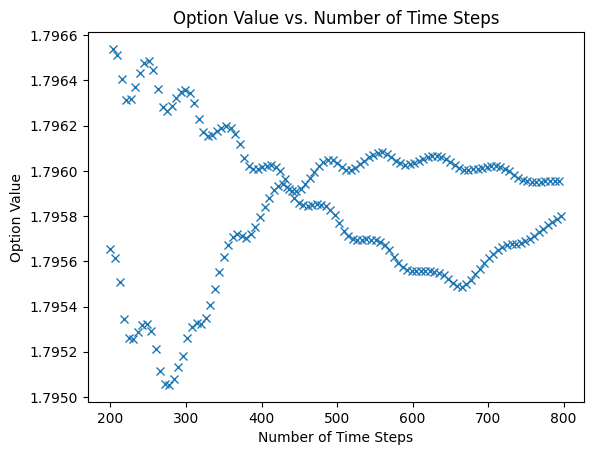

In [50]:
#Fig 18.1
ms = np.arange(200,800,3)
S0 = 9
T = 3
r = 0.06
sigma = 0.3
E = 10
put_values = []
for m in ms:
    put_values.append(binomial_method_american_put(S0, E, r, T, sigma, m)[0])
plt.plot(ms, put_values, 'x')
plt.xlabel('Number of Time Steps')
plt.ylabel('Option Value')
plt.title('Option Value vs. Number of Time Steps')
plt.show()
#print(put_values)

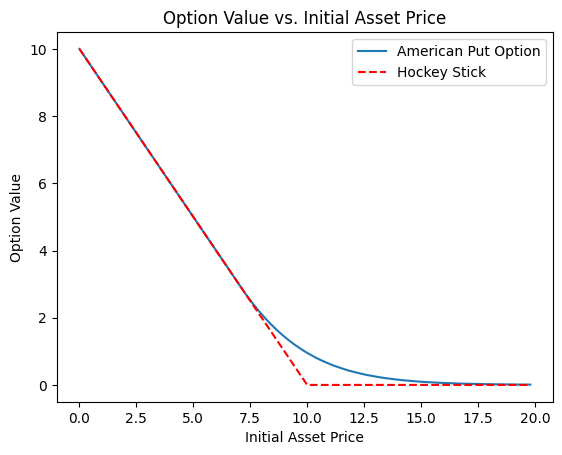

In [51]:
#Fig 18.3
T = 1
r = 0.06
sigma = 0.3
E = 10

M = 100
S0s = np.arange(0, 20, 0.2)

put_values = []
for S0 in S0s:
    put_values.append(binomial_method_american_put(S0, E, r, T, sigma, M)[0])
hockey = np.maximum(E-S0s,0)
# print(put_values)

plt.plot(S0s, put_values, '-', label = 'American Put Option')
plt.plot(S0s, hockey, 'r--', label='Hockey Stick')
plt.xlabel('Initial Asset Price')
plt.ylabel('Option Value')
plt.title('Option Value vs. Initial Asset Price')
plt.legend()
plt.show()

Time-zero value of the option: 0.5054193705579264


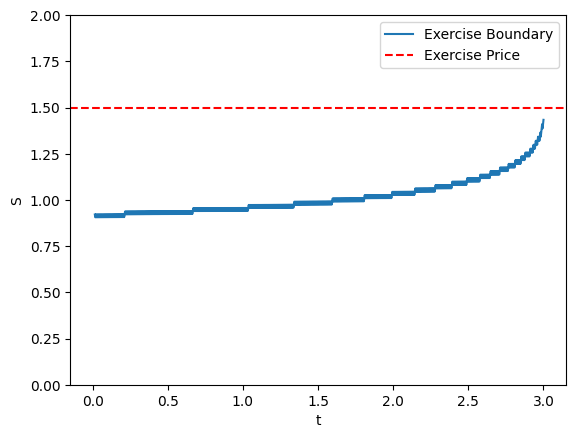

In [52]:
# Fig 18.4
S0=1
T = 3
r = 0.05
sigma = 0.3
E = 1.5
M = 1000
x = binomial_method_american_put(S0, E, r, T, sigma, M)
boundary = x[1][::-1]
#print(boundary)


print(f"Time-zero value of the option: {x[0]}")


plt.plot(np.linspace(0, T , M), boundary, linestyle='-',label='Exercise Boundary')
plt.ylim(0, 2)
plt.axline((0, E), slope=0, color='r', linestyle='--', label='Exercise Price')
plt.xlabel('t')
plt.ylabel('S')
plt.legend()
plt.show()

#### 2b)
Compute the time-zero value of a corresponding Bermudan put option, respectively, with 3, 6, 12 and 36 equally spaced early-exercise dates. Compared with American options in Question (2.a), what are your findings ?

In [53]:
def binomial_method_bermudan_put(S0, E, r, T, sigma, M, num_exercise_dates = 3 ):
    """
    Calculate the value of a Bermudan put option using the binomial method.
    :param S0: initial asset price
    :param E: exercise price
    :param r: interest rate
    :param T: time to maturity
    :param sigma: volatility
    :param M: number of time steps
    :param num_exercise_dates: number of equally spaced early-exercise dates
    :return: option value and exercise boundary
    """
    dt = T / M
    u = np.exp(sigma * np.sqrt(dt) + (r - 0.5 * sigma ** 2) * dt)
    d = np.exp(-sigma * np.sqrt(dt) + (r - 0.5 * sigma ** 2) * dt)
    p = (np.exp(r * dt) - d) / (u - d)

    # vectorize the stock price tree
    dpowers = d ** np.arange(start=M, stop=-1, step=-1)
    upowers = u ** np.arange(start=0, stop=M + 1, step=1)
    S = S0 * dpowers * upowers

    W = np.maximum(E - S, 0)
    exercise_boundary = []

    exercise_steps = np.linspace(0, M, num_exercise_dates, dtype=int)

    for i in range(M, 0, -1):
        # compute possible stock prices at time i
        Si = S0 * dpowers[M - i + 1:M + 1] * upowers[:i]
        continuation_value = np.exp(-r * dt) * (p * W[1:i + 1] + (1 - p) * W[:i])

        # if the current step is an exercise date, compare the exercise value with the continuation value
        if i in exercise_steps:
            exercise_value = E - Si
            W = np.maximum(exercise_value, continuation_value)

            boundary_price = np.max(Si[exercise_value > continuation_value]) if np.any(exercise_value > continuation_value) else np.nan
            exercise_boundary.append(boundary_price)
        else:
            # otherwise, only consider the continuation value
            W = continuation_value

    return [W[0], exercise_boundary]

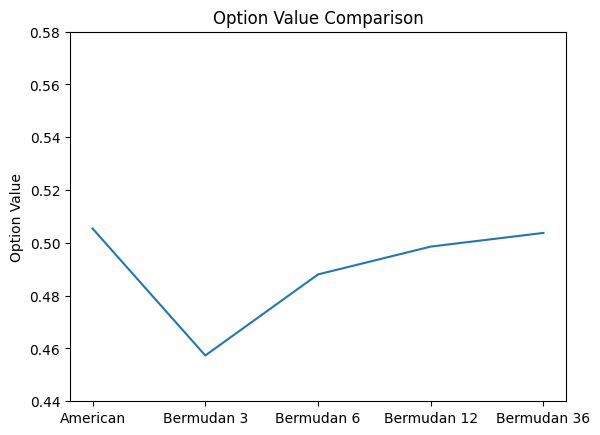

[np.float64(0.5054364160455024), np.float64(0.4573460320676299), np.float64(0.4880527948485085), np.float64(0.49859605761144393), np.float64(0.5037749425098953)]


In [54]:
S0=1
T = 3
r = 0.05
sigma = 0.3
E = 1.5
M = 10_000


american_put = binomial_method_american_put(S0, E, r, T, sigma, M)[0]
bermudan_put_3 = binomial_method_bermudan_put(S0, E, r, T, sigma, M, num_exercise_dates=3)[0]
bermudan_put_6 = binomial_method_bermudan_put(S0, E, r, T, sigma, M, num_exercise_dates=6)[0]
bermudan_put_12 = binomial_method_bermudan_put(S0, E, r, T, sigma, M, num_exercise_dates=12)[0]
bermudan_put_36 = binomial_method_bermudan_put(S0, E, r, T, sigma, M, num_exercise_dates=36)[0]

plt.plot([american_put,bermudan_put_3,bermudan_put_6,bermudan_put_12,bermudan_put_36])
plt.xticks([0,1,2,3,4],['American','Bermudan 3','Bermudan 6','Bermudan 12','Bermudan 36'])
plt.ylabel('Option Value')
plt.title('Option Value Comparison')
plt.ylim(0.44,0.58)
plt.show()
print([american_put,bermudan_put_3,bermudan_put_6,bermudan_put_12,bermudan_put_36])


Compared with the American put, the Bermudan options are generally cheaper, with the value increasing with the number of exercise dates. This is because the Bermudan option has more flexibility to exercise, which is more valuable to the option holder. The American put option is the most expensive as it allows the holder to exercise at any time before the expiration date.

#### 2c)

In [55]:
import random
def binomial_method_shout_put(S0, E, r, T, sigma, M, num_simulations=1000):
    """
    Calculate the value of a shout put option using the binomial method.
    This mathod involves a random shouting time, which is simulated more times, much like Monte Carlo
    trials in order to estimate the option value accurately.
    :param S0: initial asset price
    :param E: exercise price
    :param r: interest rate
    :param T: time to maturity
    :param sigma: volatility
    :param M: number of time steps
    :param num_simulations: number of simulations to average over.
    :return: estimated option value
    """
    dt = T / M
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Store the option values from multiple simulations
    option_values = []

    for _ in range(num_simulations):
        # Compute stock price tree
        dpowers = d ** np.arange(start=M, stop=-1, step=-1)
        upowers = u ** np.arange(start=0, stop=M + 1, step=1)
        S = S0 * dpowers * upowers

        # initialize option payoff at maturity
        W = np.maximum(E - S, 0)

        # select a random shouting time
        shouting_time = random.randint(0, M)

        # Perform backward induction
        for i in range(M, 0, -1):
            Si = S0 * dpowers[M - i + 1:M + 1] * upowers[:i]
            continuation_value = np.exp(-r * dt) * (p * W[1:i + 1] + (1 - p) * W[:i])

            if i == shouting_time:  # if the current step is the shouting time
                W = np.maximum(W[:i], continuation_value) # compare the current option value with the continuation value
            else:
                exercise_value = np.maximum(E - Si, 0)
                W = np.maximum(exercise_value, continuation_value)

        # store the option value from this simulation
        option_values.append(W[0])

    # return the average of the option value over num_simulations trials.
    return np.mean(option_values)


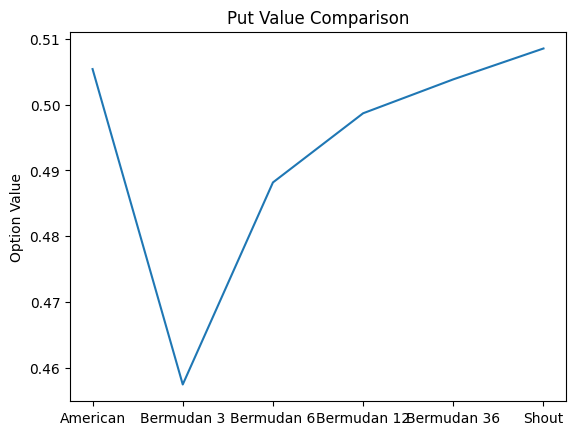

In [56]:
S0=1
T = 3
r = 0.05
sigma = 0.3
E = 1.5
M = 1000

american_put = binomial_method_american_put(S0, E, r, T, sigma, M)[0]
bermudan_put_3 = binomial_method_bermudan_put(S0, E, r, T, sigma, M, num_exercise_dates=3)[0]
bermudan_put_6 = binomial_method_bermudan_put(S0, E, r, T, sigma, M, num_exercise_dates=6)[0]
bermudan_put_12 = binomial_method_bermudan_put(S0, E, r, T, sigma, M, num_exercise_dates=12)[0]
bermudan_put_36 = binomial_method_bermudan_put(S0, E, r, T, sigma, M, num_exercise_dates=36)[0]
shout_put = binomial_method_shout_put(S0, E, r, T, sigma, M, num_simulations=1000)

plt.plot([american_put,bermudan_put_3,bermudan_put_6,bermudan_put_12,bermudan_put_36, shout_put])
plt.xticks([0,1,2,3,4,5],['American','Bermudan 3','Bermudan 6','Bermudan 12','Bermudan 36', 'Shout'])
plt.ylabel('Option Value')
plt.title('Put Value Comparison')
# plt.ylim(1.35,1.48)
plt.show()


As far as the options are concerned, we conclude that the shoult is the most expensive of all, which could be from the fact that it has the most flexibility to exercise. The Bermudan options are generally cheaper than the American put, with the value increasing with the number of exercise dates. The American put option is the second most expensive as it allows the holder to exercise at any time before the expiration date. The shout put is the most expensive as the holder can secure a better price without actually exercising, making the possible wins much bigger and the 'losses' smaller.

## Exercise 3: Monte Carlo Simulation

a) Solve:
- value an arithmetic average Asian put option with payoff $$\max(E − \frac{1}{n} \sum^n_{i=1} S(t_i), 0)$$ (here n = 52).
- value a fixed strike lookback put option with payoff $max(E − S^{min}, 0)$

In [57]:
### Parameters ###
T = 1
S0 = 1
E = 1.2
r = 0.05
sigma = 0.3
# n = 52, T = 1 year
###################

In [58]:
def simulate_asset_path(S0, r, sigma, T, n):
    """
    Simulate an asset price path using the Black-Scholes model.
    :param S0: initial asset price
    :param r: interest rate
    :param sigma: volatility
    :param T: time to maturity
    :param n: number of time steps
    :return: asset price path
    """
    dt = T / n
    W = np.random.normal(0, np.sqrt(dt), n)
    t = np.linspace(0, T, n)
    S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt + sigma * W))
    return S

def asian_option_payoff(S, E):
    """
    Calculate the payoff of an arithmetic average Asian put option.
    :param S: asset price path
    :param E: exercise price
    :return: option payoff
    """
    return np.maximum(E - np.mean(S), 0)

def lookback_option_payoff(S, E):
    """
    Calculate the payoff of a fixed strike lookback put option.
    :param S: asset price path
    :param E: exercise price
    :return: option payoff
    """
    return np.maximum(E - np.min(S), 0)

In [59]:
M = 20001

asian_option_values = []
lookback_option_values = []

for i in range(M):
    S = simulate_asset_path(S0, r, sigma, T, 52)
    asian_option_values.append(asian_option_payoff(S, E))
    lookback_option_values.append(lookback_option_payoff(S, E))
    if [50, 100, 500 ,1000,2000,5000,10000,20000].__contains__(i):
        asian_option_value = np.mean(asian_option_values )* np.exp(-r * T)
        lookback_option_value = np.mean(lookback_option_values)* np.exp(-r * T)

        print(f'Asian Option Value ({i} Monte Carlo Trials): {round(asian_option_value,4)}')
        print(f'Lookback Option Value ({i} Monte Carlo Trials): {round(lookback_option_value,4)}')
        print("---------------------------------------------------------")

print(asian_option_value,lookback_option_value)

Asian Option Value (50 Monte Carlo Trials): 0.1481
Lookback Option Value (50 Monte Carlo Trials): 0.3201
---------------------------------------------------------
Asian Option Value (100 Monte Carlo Trials): 0.1751
Lookback Option Value (100 Monte Carlo Trials): 0.3428
---------------------------------------------------------
Asian Option Value (500 Monte Carlo Trials): 0.1777
Lookback Option Value (500 Monte Carlo Trials): 0.3517
---------------------------------------------------------
Asian Option Value (1000 Monte Carlo Trials): 0.1811
Lookback Option Value (1000 Monte Carlo Trials): 0.3573
---------------------------------------------------------
Asian Option Value (2000 Monte Carlo Trials): 0.1837
Lookback Option Value (2000 Monte Carlo Trials): 0.3591
---------------------------------------------------------
Asian Option Value (5000 Monte Carlo Trials): 0.1856
Lookback Option Value (5000 Monte Carlo Trials): 0.3592
---------------------------------------------------------
Asian 

b) Employ a variance reduction technique to approximate their Delta at time t = 0 and investigate how the numerical error varies over the number of asset paths.

I will be using the _antithetic variates_ method as a variance reduction technique.

In [60]:
# vectorize the payoff functions defined above
def asian_option_payoff(S, E):
    return np.maximum(E - np.mean(S, axis=0), 0)

def lookback_option_payoff(S, E):
    return np.maximum(E - np.min(S, axis=0), 0)


def antithetic_variates_delta(S0, r, sigma, T, E, n, M, epsilon, payoff_function):
    """
    Estimate the delta of an option using the antithetic variates method.
    :param S0: initial asset price
    :param r: interest rate
    :param sigma: volatility
    :param T: time to maturity
    :param E: exercise price
    :param n: number of Monte Carlo samples
    :param M: number of time steps
    :param epsilon: offset for delta estimation
    :param payoff_function: option payoff function
    :return: delta estimate and standard deviation
    """
    dt = T / M
    Z = np.random.normal(0, 1, (M, n))
    mZ = -Z  # the antithetic counterpart of Z

    # compute asset price paths (normal and antithetic)
    S = np.zeros((M+1, n))
    mS = np.zeros((M+1, n))
    eS = np.zeros((M+1, n))
    emS = np.zeros((M+1, n))

    # start off from S0
    S[0], mS[0], eS[0], emS[0] = S0, S0, S0 + epsilon, S0 + epsilon

    # then, simulate asset paths using the Black-Scholes model and Z/mZ
    for t in range(1, M+1):
        S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[t-1])
        mS[t] = mS[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * mZ[t-1])
        eS[t] = eS[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[t-1])
        emS[t] = emS[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * mZ[t-1])

    # compute option payoffs
    payoff = payoff_function(S, E)
    epayoff = payoff_function(eS, E)
    mpayoff = payoff_function(mS, E)
    empayoff = payoff_function(emS, E)

    # compute delta estimates, as indicated from the book
    delta_standard = np.exp(-r * T) * (payoff - epayoff) / epsilon
    delta_antithetic = np.exp(-r * T) * (mpayoff - empayoff) / epsilon

    # combine estimates using antithetic variates technique
    deltas = (delta_standard + delta_antithetic) / 2

    # estimate delta and its standard deviation
    delta = np.mean(deltas)
    delta_std = np.std(deltas) / np.sqrt(n)

    return delta, delta_std

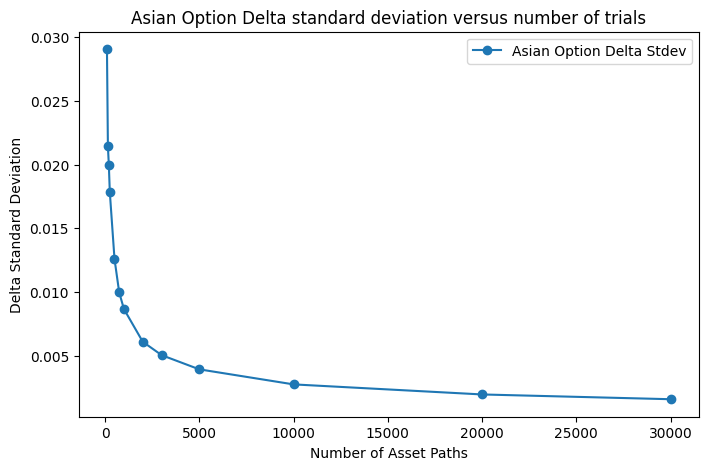

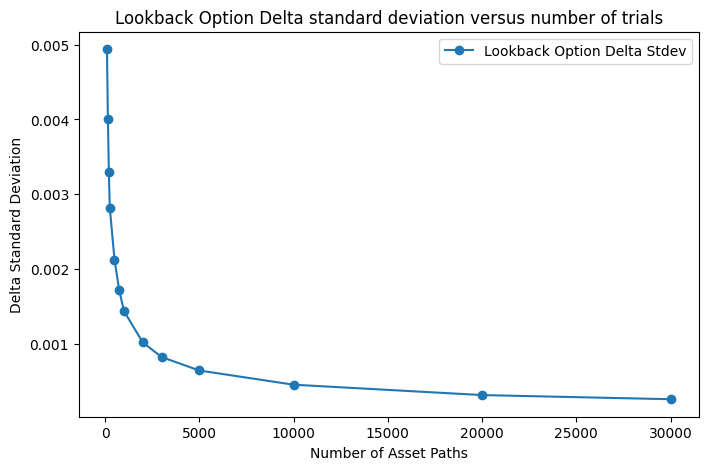

In [61]:
T = 1
S0 = 1
E = 1.2
r = 0.05
sigma = 0.3
ns = [100,150, 200,250, 500,750, 1000,2000,3000, 5000, 10000, 20000, 30_000]
M = 52
epsilon = 0.001

asian_deltas = []
lookback_deltas = []


for n in ns:
    delta_asian, stdev_asian = antithetic_variates_delta(S0, r, sigma, T, E, n,M, epsilon, asian_option_payoff)
    delta_lookback, stdev_lookback = antithetic_variates_delta(S0, r, sigma, T, E, n,M, epsilon, lookback_option_payoff)

    asian_deltas.append(stdev_asian)
    lookback_deltas.append(stdev_lookback)
    #print(delta_asian, delta_lookback)


plt.figure(figsize=(8, 5))
plt.plot(ns, asian_deltas, 'o-', label='Asian Option Delta Stdev')
plt.xlabel('Number of Asset Paths')
plt.ylabel('Delta Standard Deviation')
plt.title('Asian Option Delta standard deviation versus number of trials')
plt.legend()
plt.show()

# Plot for Lookback Option Delta Standard Deviation
plt.figure(figsize=(8, 5))
plt.plot(ns, lookback_deltas, 'o-', label='Lookback Option Delta Stdev')
plt.xlabel('Number of Asset Paths')
plt.ylabel('Delta Standard Deviation')
plt.title('Lookback Option Delta standard deviation versus number of trials')
plt.legend()
plt.show()

As we can see, with more trials the standard deviation of the delta estimate decreases, which is expected as the more trials we have, the more accurate the estimate will be.

# Exercise 4: Finite Difference Methods

The Black-Scholes PDE is given by:
$$\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2S^2\frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0$$
With a payoff function $\Lambda(S(T))$ at maturity $T$.

## a) Exercise 23.2

### The forward difference ($\Delta y_m =  y_{m+1} - y_m$):
The Taylor Series for $y_{m+1}$ is:
$$y_{m+1} = y_m + hy' + \frac{h^2}{2}y'' + \frac{h^3}{6}y''' + \cdots$$
In longer terms, we can write:
$$y_{m+1} = y_m + ((m+1)*h - m*h)*\frac{dy}{dx} + \frac{((m+1)*h - m*h)^2}{2}\frac{d^2y}{dx^2} + \frac{((m+1)*h - m*h)^3}{6}\frac{d^3y}{dx^3} + \cdots$$

We obtain this from the fact that y is a smooth function, h is the step size (which is inherently small), so the following equation holds:
$$\frac{y(m+h) - y(x)}{h} = \frac{dy}{dx}$$
For more accuracy, we can use the Taylor Series expansion to get the higher-order terms.

Moving the terms around, we get:
$$ \Delta y_m = y_{m+1} - y_m = hy' + \frac{h^2}{2}y'' + \frac{h^3}{6}y''' + \cdots$$
### The backward difference ($\nabla y_m =  y_{m} - y_{m-1}$):
The Taylor Series for $y_{m-1}$ is:
$$y_{m-1} = y_m - hy' + \frac{h^2}{2}y'' - \frac{h^3}{6}y''' + \cdots$$ (since the difference between $y_{m-1}$ and $y_m$ is $-h$).

Moving the terms around, we get:
$$ \nabla y_m = y_{m} - y_{m-1} = hy' - \frac{h^2}{2}y'' + \frac{h^3}{6}y''' + \cdots$$

### The half central difference ($\delta y_m =  y_{m+1/2} - y_{m-1/2}$):
The Taylor Series for $y_{m+1/2}$ is:
$$y_{m+1/2} = y_m + \frac{h}{2}y' + \frac{h^2}{8}y'' + \frac{h^3}{48}y''' + \cdots$$
The Taylor Series for $y_{m-1/2}$ is:
$$y_{m-1/2} = y_m - \frac{h}{2}y' + \frac{h^2}{8}y'' - \frac{h^3}{48}y''' + \cdots$$
Now, subtracting the series above, we get:
$$ \delta y_m = y_{m+1/2} - y_{m-1/2} = hy' + \frac{h^3}{24}y''' + \cdots$$

### The full central difference ($\Delta_0 y_m =  \frac{1}{2}(y_{m+1} - y_{m-1})$):

Using the Taylor Series derived above for $y_{m+1}$ and $y_{m-1}$ and adding them up and dividing by 2, we get:
$$ \Delta_0 y_m = \frac{1}{2}(y_{m+1} - y_{m-1}) = hy' + \frac{h^3}{6}y''' + \cdots$$


### The second order central difference ($\delta_2 y_m =  y_{m+1} - 2y_m + y_{m-1}$):

Using the Taylor Series derived above for $y_{m+1}$ and $y_{m-1}$ and subtracting $2y_m$ from them, we get:
$$ \delta_2 y_m = y_{m+1} - 2y_m + y_{m-1} = h^2y'' + \frac{h^4}{12}y^{(4)} + \cdots $$

### The shift ($E =  y_{m+1}$):
$$y_{m+1} = y_m + hy' + \frac{h^2}{2}y'' + \frac{h^3}{6}y''' + \cdots$$

### The average ($\mu =  \frac{1}{2}(y_{m+\frac{1}{2}} + y_{m-\frac{1}{2}})$):

Using the Taylor Series derived above for $y_{m+1/2}$ and $y_{m-1/2}$ and adding them up and dividing by 2, we get:
$$ \mu = \frac{1}{2}(y_{m+1/2} + y_{m-1/2}) = y_m + \frac{h^2}{8}y'' + \cdots$$

## b)

1))

<img src="images/4b) 1_1.jpeg"  width="500" >
<img src="images/4b) 1_2.jpeg"  width="500" >

2))
For the FTCS in Equation (2),
$u_i^{n+1}=u_i^n+\lambda(u_{i+1}^n−2u_i^n+u_{i−1}^n)$, where $\lambda=\frac{\Delta\tau}{\Delta x^2}$

The Von Neumann stability condition requires $\lambda\leq\frac{1}{2}$.

The Binomial Method doesn't converge uniformly because its finite difference scheme is right on the cusp of Von Neumann instability. While it does approximate the Black-Scholes PDE, it is sensitive to grid refinement and has discretization errors that can lead to instability, which also explains the non-uniform convergence which has been shown above, in Exercise 2.
$ \frac{\partial u}{\partial \tau} = \frac{1}{2} \sigma^2 \frac{\partial^2 u}{\partial x^2}$

3))

In [62]:
### Parameters ###
S0 = 10
E = 10
r = 0.06
sigma = 0.3
T = 1
###################

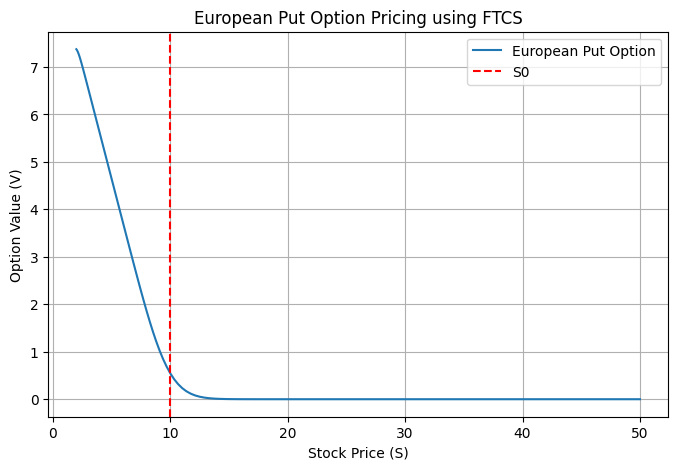

In [63]:
M = 100     # Number of time steps
N = 100     # Number of space steps

# Grid definition
S_max = 5 * S0  # Define a reasonable max S range
dy = np.log(S_max / S0) / (N // 2)  # Log transformation step
dx = dy  # Keep dx same as dy
dtau = (dx ** 2) / (2 * sigma ** 2) * 0.5  # Stability condition

x_max = np.log(S_max)
x_min = np.log(S0) - (N//2) * dx  # Ensure symmetry around log(S0)
x = np.linspace(x_min, x_max, N+1)
tau = np.linspace(0, T, M+1)

# Initial and boundary conditions
nu = np.maximum(E - np.exp(x), 0)  # Transformed put option payoff
nu_new = np.copy(nu)  # Ensure nu_new is also a NumPy array

# FTCS scheme
for j in range(1, M + 1):
    for i in range(1, N):
        nu_new[i] = nu[i] + (dtau / (dx ** 2)) * (0.5 * sigma ** 2) * (nu[i+1] - 2 * nu[i] + nu[i-1])

    # Boundary conditions
    nu_new[0] = E * np.exp(-r * (j * dtau)) - np.exp(x_min)  # Dirichlet boundary at low x
    nu_new[-1] = 0  # At high x, the put option value approaches 0

    nu[:] = nu_new[:]  # Update nu with new values

# Transform back to V
V = np.exp(-r * tau[-1]) * nu
S_vals = np.exp(x)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(S_vals, V, label="European Put Option")
plt.axvline(S0, color='r', linestyle='--', label='S0')
plt.xlabel("Stock Price (S)")
plt.ylabel("Option Value (V)")
plt.title("European Put Option Pricing using FTCS")
plt.legend()
plt.grid()
plt.show()